## Bubble dissolution _à la_ Venerus JNNFM 2015

* dependencies : [`process_functions.py`](./process_functions.py), [`Dissolution_type.png`](./Dissolution_type.png) (for experimental data), `scipy`, `numpy` and `matplotlib`
* based on [Venerus, JNNFM (2015)](./Venerus_DissolutionYSFluids_JNNFM2015.pdf), also [Fyrillas _et al._, Langmuir (2000)](./Fyrillas_DissolutionElasticMedium_Langmuir2000.pdf), and [Kloek _et al._, JCIS (2001)](./Kloek_Dissolution_JCIS2001.pdf) and finally [Michelin _et al._, PRF (2018)](./Michelin_CollectiveDissolution_PRF2018.pdf)


### Basic quantities : 

We consider here the dissolution of small bubbles in a Carbopol. We have : 

* $R_0 = 10^{-4}~{\text m}$ the initial bubble radius
* $\Gamma = 0.07~{\rm N}.{\rm m}^{-1}$ the Carbopol surface tension, which is reasonable considering independent experiments done here and the existing literature.
* $\rho = 1000~{\rm kg}.{\rm m}^{-3}$ the Carbopol density
* $A p_0 = \bar{\rho_0} = 1.3~{\rm kg}.{\rm m}^{-3}$ is the density of the bubble in the absence of surface tension, elasticity, etc. for an ideal gas. We then have $A = M/ {\cal R}T$ with $T$ the temperature, ${\cal R}$ the ideal gas constant and $M$ the molar mass of the gas.
* $k_H p_0 = 2.0 . 10^{-5}$ Henry's law constant giving the mass fraction $w$ of dissolved gas in water at thermal equilibrium at a pressure $p_0$ in water (I consider that it will be the same in Carbopol)
* $\sigma_{\rm Y} = 9.5~{\rm Pa}$ is the yield stress of the Carbopol 
* $\eta = 7~{\rm Pa}.{\rm s}$ has been obtained from a very crude linear approximation of the extra stress in the Carbopol between $\dot\gamma = 0$ and $\dot\gamma = 1 {\rm s}^{-1}$ 
* $G = 90~{\rm Pa}$ the linear shear elastic modulus of the Carbopol
* $D = 2.0 \times 10^{-9}~{\rm m}^2.{\rm s}^{-1}$ is the diffusion coefficient of air in water (I consider it will be the same in Carbopol) 

### Driving force $N_a$

There is a difference between the paper and our experiments. In the Venerus paper, _at the initial stage_, a bubble is at equilibrium with its surroundings with a pressure outside the bubble being uniform and set to $p_0 + \Delta p_0$. We then suddenly change the pressure to $p_0$ to drive bubble dissolution (if $\Delta p_0 \leq 0$) or growth ($\Delta p_0 \geq 0$). The amplitude of the forcing term is being computed as 

$$ N_a = \frac{w_0 - w_1}{1 - w_1} \frac{\rho}{A p_0} $$

where  $w_0 = k_H (p_0 + \Delta p)$ is the mass fraction of solute initially and $w_1 = k_H p_0$ is another characteristic mass fraction.

In our experiments, we are injecting a bubble in a medium where, originally, we expect equilibrium with the outside air, so $w(t < 0) = w_1$. This corresponds more closely to the Fyrillas and Kloek papers. I interpret our experiment -- from the point of view of the Venerus JNNFM paper -- as a sudden switch of surface tension, elasticity and plasticity effects at $t = 0^+$, leading to an initial additional pressure term $\Delta p = 2\Gamma / R_0$. This bubble would indeed be in equilibrium with a medium with a solute mass fraction $w = w_0$ choosing $\Delta p = 2 \Gamma / R_0$, $\Gamma$ being the matrix surface tension and $R_0$ the initial bubble radius. 

Notations are then a bit reversed between the paper and our experiments, but the absolute value of $N_a$ is really what matters, and we can estimate it for a typical experiment in Carbopol. Considering the values of [Henry's law constants for nitrogen and oxygen](https://en.wikipedia.org/wiki/Henry's_law?section=19#Values_of_Henry's_law_constants), we can safely assume that $w_1 \ll 1$, leading to : 

$$ N_a = k_H \frac{2 \Gamma}{R_0} \frac{\rho}{A p_0}  = 2 \times 10^{-4}$$

So we should be in the case $N_a \to 0$

### Other quantities

Considering the properties of the Carbopol, we are fully in the "diffusion-controlled" case : 

$$ N_{\rm p} = \frac{\eta D}{R_0^2 p_0} = 1.4 \times 10^{-5} $$ 

The normalised pressure term $N_{\Delta p}$ can also be computed, leading to a relatively small relative pressure change in the bubble initially : 

$$ N_{\rm \Delta p } = \left ( 1 + \frac{2 \Gamma}{ R_0 p_0} \right )^{-1} = 0.985$$

The capillary number can also be estimated, and is small : 

$$ N_{\rm Ca} = \eta D / \Gamma R_0 = 2 \times 10^{-3}$$

We can also estimate the typical yield-strain ratio of the Carbopol which is typical for all the Carbopols I have been using :

$$ N_\sigma = \frac{\sigma_{\rm Y}}{G} = 0.1 $$

We also estimate the Deborah number, which is also small : 

$$ N_{\rm De} = \eta D/ G R_0^2 = 0.015 $$ 

And finally, the Bingham number, which is relatively large : 

$$ N_{\rm Bn} = \sigma R_0^2 / D \eta = 7 $$

### A few things about the code : 

Considering the values of $N_{\rm p}$ and $N_{\rm a}$, I have completely omitted viscous contributions to the stress in Equation (22) of the 2015 JNNFM paper of Venerus. They will be small anyway maybe except very close to bubble dissolution, which will only affect the last experimental data points of the dissolution profiles.

I have first computed, for this value of $N_{\sigma}$, a function that yields the extent $S$ of the yielded region as a function of $R$ and $R_0$. This can be done (badly) by computing this extent $S$ for plenty of values of $R/R_0 = \epsilon$ [numerically solving Equation (20) from the paper] and creating an 'interpolating function' to produce values of $S$ for any $\epsilon$. This is not too problematic since $S$ is not really singular for any $\epsilon$ and tends to a well-defined constant value for $R \to 0$ and to a value proportional to $R$ for $\epsilon \to \infty$.

This allows us to compute the elastic and plastic contributions to the bubble pressure [from Equation (22)] for any given $\epsilon = R/R_0$. Since both terms involve $S$, I have also created interpolating functions to compute them for any $\epsilon$. 

Summing these two contributions and adding the Laplace term give the total extra pressure in the bubble compared to far away from it, $p(R) - p_0$. 

#### Breakdown of the standard parameters as a function of $R$

c:\Users\saint-michel\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
d:\Brice\Python\bubbledissolution_venerus\process_functions.py:188: RuntimeWarning: invalid value encountered in power
  vfun = lambda R, S_fun : ((1 - (R**3 - 1**3)/S_fun**3)**(+4/3) - 1)**2 \
d:\Brice\Python\bubbledissolution_venerus\process_functions.py:189: RuntimeWarning: invalid value encountered in power
  + 2*((1 - (R**3 - 1**3)/S_fun**3)**(-2/3) - 1)**2 \


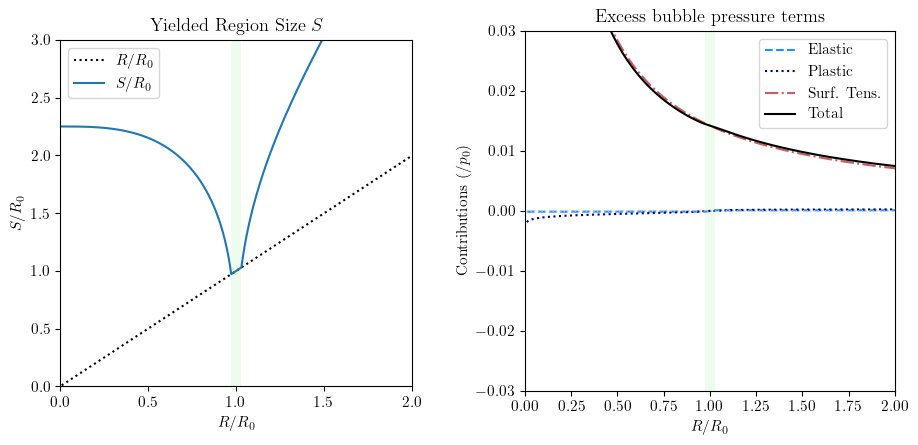

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import process_functions as prc

#### WE CAN PLAY WITH MATRIX PROPERTIES HERE
bubble = prc.bubble_params(G=100, yieldstress=10, R=100e-6, surftens=.072)
####

S_fun, dS_fun = prc.S_fun(bubble)
P_fun = prc.P_fun(bubble, S_fun)
G_fun = prc.G_fun(bubble, S_fun)
YS_fun = prc.YS_fun(bubble, S_fun)
ST_fun = lambda eps : 2*bubble.surftens/bubble.r0/eps/bubble.p0

r0 = bubble.r0
eps = np.linspace(0.01,2,5000) 
unyielded, = np.where(YS_fun(eps) == 0)
Rmin, Rmax = eps[unyielded[0]], eps[unyielded[-1]]

#######################################################################################################################################################
# Figure generation
# A few MATPLOTLIB parameters first

rc_params = {'text.usetex':True,
              'font.family':'serif',
              'font.size':11}
plt.rcParams.update(rc_params)
fig, ax = plt.subplots(ncols=2)

# Drawing things on figure
ax[0].plot(eps, eps, 'k:', label='$R/R_0$')
ax[0].plot(eps, S_fun(eps), '-', label='$S/R_0$')

ax[1].plot(eps, G_fun(eps)  , '--', color='dodgerblue', linewidth=1.5, label='Elastic')
ax[1].plot(eps, YS_fun(eps) , ':' , color='navy'      , linewidth=1.5, label='Plastic')
ax[1].plot(eps, ST_fun(eps) , '-.', color='indianred' , linewidth=1.5, label='Surf. Tens.')
ax[1].plot(eps, P_fun(eps)-1, '-' , color='black'     , linewidth=1.5, label='Total')
ax[1].plot(eps, 0*eps       , ':' , color='lightgray' , linewidth=1)

rect0 = patches.Rectangle(xy=(Rmin, -1), width=(Rmax-Rmin), height=4, \
                         facecolor='lightgreen', edgecolor='none', alpha=0.15)                         
rect1 = patches.Rectangle(xy=(Rmin, -1), width=(Rmax-Rmin), height=2, \
                         facecolor='lightgreen', edgecolor='none', alpha=0.15)

ax[0].add_patch(rect0)
ax[1].add_patch(rect1)

# Figure Formatting
fig.set_size_inches(w=10, h=4.5)

ax[0].legend()
ax[1].set_position([0.09,0.10,0.37,0.8])
ax[0].set_title('Yielded Region Size $S$')
ax[0].set_xlabel('$R/R_0$')
ax[0].set_ylabel('$S/R_0$')
ax[0].set_xlim([0,2])
ax[0].set_ylim([0,3])

ax[1].set_position([0.59,0.10,0.37,0.8])
ax[1].set_ylim([-0.03, 0.03])
ax[1].set_title('Excess bubble pressure terms')
ax[1].set_ylabel('Contributions ($/p_0$)')
ax[1].set_xlabel('$R/R_0$')
ax[1].set_xlim([0,2])
ax[1].legend()

plt.show()

We do recover here the $S/R_0 \to 2.25$ of Fig.3 (right) of Venerus JNNFM 2015 (with the x axis flipped), which is quite reassuring. Considering values of $N_\sigma$ above $0.1$ seems a bit odd to me, since most yield-stress fluids are more _fragile_ than Carbopol. Reasonable limits for such a value should be between $0$ and $0.2$. The range of radii for which the matrix is unyielded is very small, and only spans from $R/R_0 =  0.97$ to $R/R_0 = 1.03$.

In the figure on the right, we quite clearly see that the elastic and plastic contributions to the pressure inside the bubble are really small compared to the Laplace pressure. The impact of the yield-stress matrix on the dissolution process should then be minimal.

### Modelling the bubble dissolution as a function of time 

The 2015 JNNFM paper does not really provide an explicit (ordinary) differential equation to solve to express the evolution of the radius as a function of time $R(t)$ in the case of bubble dissolution in the case of a bubble injected in an (un-)saturated medium, but we can use the results of a [previous paper from Fyrillas _et al_. (2000)](https://pubs.acs.org/doi/full/10.1021/la990784y) [Equation (2.4) notably] and [another previous paper from Kloek _et al._(2001)](https://doi.org/10.1006/jcis.2001.7454), still ignoring the viscous contributions. 

$$ \dot{R} = - 3  D \mathcal{R} T k_H \frac{p(R) - c_0 / k_H}{\Big [ 3 p(R) + R \partial_R [p(R)] \Big ] } \left ( \frac{1}{R} + \sqrt\frac{1}{\pi D t} \right ) $$ 

Here, we have used the _molar concentration_ $c_0$ of the dissolved gas rather than the mass fraction $w_0$. They are related using the following relation : 

$$ c = \frac{w}{M} \frac{\rho_s \rho}{\rho w + \rho_s (1 - w)} $$ 

using $M$ as the molar mass of the gas, $\rho$ the matrix density (Carbopol) and $\rho_s$ the density of the gas solute in the matrix. For the low solute concentrations we are considering, we can more simply use $ c = x \rho / M$. Computing the solution of the above differential equation, we need  to use another interpolating function to compute the derivative of $p(R)$, $\partial_R [p(R)]$, as a function of $R$ and $R_0$. The value $c_0 / k_H$ here simply represents the pressure that the bubble needs to match to stop dissolving.  If the surrounding medium is initially at thermodynamic equilibrium with its surroundings, we can safely assume that $c_0 /k_H = p_0$, but sometimes the surrounding medium is not fully saturated with gas ; we then use $c_0 / k_H = f p_0$ with $f$ the _saturation_ factor.

We note that $k_H \mathcal{R} T$ is a dimensionless group, highlighting the need to make the equations dimensionless by using $D$. We can follow the conventions of either Venerus or Kloek _et al_., which are essentially the same, using $\epsilon = R/R_0$ as done above and $x^2 = D t / R_0^2$. We can then rewrite our differential equation, writing $\tilde{p} = p(R)/p_0$ :

$$ \frac{\partial \epsilon}{\partial x} = - 6 k_H \mathcal{R} T \frac{\tilde{p} - f}{3 \tilde{p} + \epsilon \partial \tilde{p} / \partial \epsilon} \left ( \frac{x}{\epsilon} + \frac{1}{\sqrt{\pi}} \right ) $$

This equation can easily be solved using a RK45 scheme from `scipy`, and also supports very well the use of _events_, i.e. they can stop the integration when $R(t)$ reaches $0$. 

Let us now compare three dissolution profiles, one (`bubble1`) with no elastic modulus (in which case the yield stress does not matter), one (`bubble2`) with a small elastic modulus and yield stress corresponding to the Carbopols I have been using in my experiments, and one stiffer yield-stress fluid (`bubble3`)

c:\Users\saint-michel\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
d:\Brice\Python\bubbledissolution_venerus\process_functions.py:188: RuntimeWarning: invalid value encountered in power
  vfun = lambda R, S_fun : ((1 - (R**3 - 1**3)/S_fun**3)**(+4/3) - 1)**2 \
d:\Brice\Python\bubbledissolution_venerus\process_functions.py:189: RuntimeWarning: invalid value encountered in power
  + 2*((1 - (R**3 - 1**3)/S_fun**3)**(-2/3) - 1)**2 \
C:\Users\saint-michel\AppData\Local\Temp\ipykernel_11624\4038094120.py:16: RuntimeWarning: divide by zero encountered in divide
  ST_fun = lambda eps : 2*bubble.surftens/bubble.r0/eps/bubble.p0 # This one is the same for all


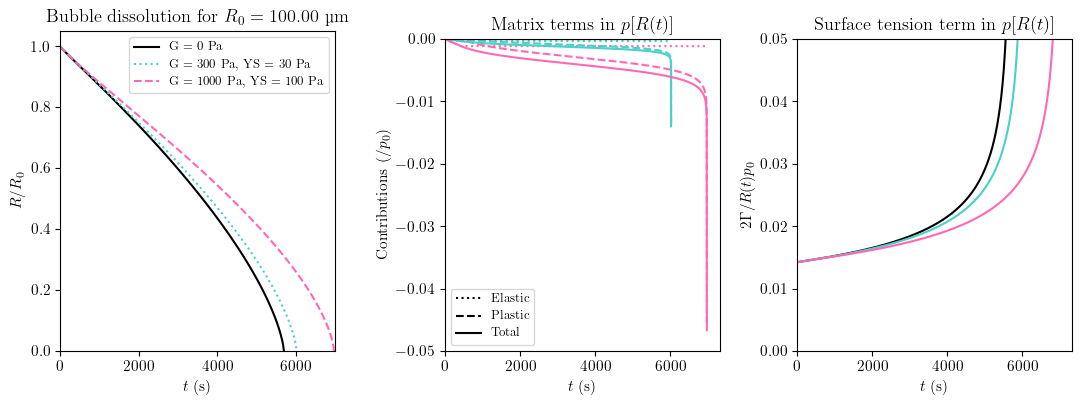

In [13]:
R0 = 100e-6
bubble1 = prc.bubble_params(R=R0, G=0, yieldstress=30, surftens=0.072)
bubble2 = prc.bubble_params(R=R0, G=300, yieldstress=30, surftens= 0.072)
bubble3 = prc.bubble_params(R=R0, G=1000, yieldstress=100, surftens=0.072)

bubble1 = prc.model_dissolution_Venerus(bubble1)
bubble2 = prc.model_dissolution_Venerus(bubble2)
bubble3 = prc.model_dissolution_Venerus(bubble3)

S2_fun, _ = prc.S_fun(bubble2)
S3_fun, _ = prc.S_fun(bubble3)             # NOTE : S2_fun and S3_fun will here be the same since the radio YS/G is the same for both, but it is not necessarily the case
G2_fun = prc.G_fun(bubble2, S2_fun)
G3_fun = prc.G_fun(bubble3, S3_fun)
YS2_fun = prc.YS_fun(bubble2, S2_fun)
YS3_fun = prc.YS_fun(bubble3, S3_fun)
ST_fun = lambda eps : 2*bubble.surftens/bubble.r0/eps/bubble.p0 # This one is the same for all

#######################################################################################################################################################
# Figure generation

fig, ax = plt.subplots(ncols=3)
ax[0].plot(bubble1.time_ODEfit, (bubble1.r_ODEfit/R0)**2, '-'  , color='black'          , label= f'G = 0 Pa')
ax[0].plot(bubble2.time_ODEfit, (bubble2.r_ODEfit/R0)**2, ':'  , color='mediumturquoise', label= f'G = {bubble2.G:.0f} Pa, YS = {bubble2.yieldstress:.0f} Pa')
ax[0].plot(bubble3.time_ODEfit, (bubble3.r_ODEfit/R0)**2, '--' , color='hotpink'        , label= f'G = {bubble3.G:.0f} Pa, YS = {bubble3.yieldstress:.0f} Pa')

ax[1].plot(bubble1.time_ODEfit, 0*bubble1.r_ODEfit/R0       , ':', color='black'          , label='Elastic')
ax[1].plot(bubble2.time_ODEfit, G2_fun(bubble2.r_ODEfit/R0) , ':', color='mediumturquoise')
ax[1].plot(bubble3.time_ODEfit, G3_fun(bubble3.r_ODEfit/R0) , ':', color='hotpink')
ax[1].plot(bubble1.time_ODEfit, 0*bubble1.r_ODEfit/R0       , '--', color='black'          , label='Plastic')
ax[1].plot(bubble2.time_ODEfit, YS2_fun(bubble2.r_ODEfit/R0), '--', color='mediumturquoise')
ax[1].plot(bubble3.time_ODEfit, YS3_fun(bubble3.r_ODEfit/R0), '--', color='hotpink')
ax[1].plot(bubble1.time_ODEfit, 0*bubble1.r_ODEfit/R0                                     , '-', color='black' , label='Total')
ax[1].plot(bubble2.time_ODEfit, YS2_fun(bubble2.r_ODEfit/R0) + G2_fun(bubble2.r_ODEfit/R0), '-', color='mediumturquoise')
ax[1].plot(bubble3.time_ODEfit, YS3_fun(bubble3.r_ODEfit/R0) + G3_fun(bubble3.r_ODEfit/R0), '-', color='hotpink')

ax[2].plot(bubble1.time_ODEfit, ST_fun(bubble1.r_ODEfit/R0), '-', color='black'          )
ax[2].plot(bubble2.time_ODEfit, ST_fun(bubble2.r_ODEfit/R0), '-', color='mediumturquoise')
ax[2].plot(bubble3.time_ODEfit, ST_fun(bubble3.r_ODEfit/R0), '-', color='hotpink')

# Figure formatting
ax[0].set_position([0.05,0.12,0.25,0.80])
ax[0].set_title(f'Bubble dissolution for $R_0 = {1e6*R0:.2f} $~µm ')
ax[0].set_xlabel(f'$t$ (s)')
ax[0].set_ylabel(f'$R/R_0$')
ax[0].set_ylim([0,1.05])
ax[0].set_xlim(left=0, right=7000)
ax[0].legend(fontsize=9)

ax[1].set_position([0.40,0.12,0.25,0.78])
ax[1].set_title(f'Matrix terms in $p[R(t)]$')
ax[1].set_xlabel(f'$t$ (s)')
ax[1].set_ylabel(f'Contributions ($/p_0$)')
# ax[1].set_yticks([-0.005,-0.004,-0.003, -0.002, -0.001,-0.000])
ax[1].set_ylim([-0.05,0])
ax[1].set_xlim(left=0)
ax[1].legend(fontsize=9)

ax[2].set_position([0.72,0.12,0.25,0.78])
ax[2].set_title(f'Surface tension term in $p[R(t)]$')
ax[2].set_xlabel(f'$t$ (s)')
ax[2].set_ylabel(f'$2 \Gamma /R(t) p_0$')
ax[2].set_xlim(left=0)
ax[2].set_ylim([0,0.05])

fig.set_size_inches(w=11, h=4)

plt.show()

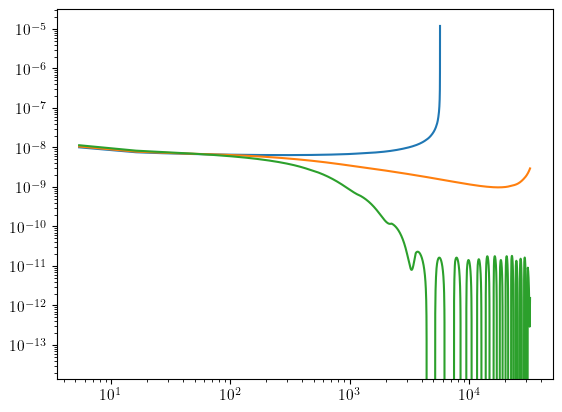

In [11]:
Rdot1 = np.diff(bubble1.r_ODEfit)/np.diff(bubble1.time_ODEfit)
Rdot2 = np.diff(bubble2.r_ODEfit)/np.diff(bubble2.time_ODEfit)
Rdot3 = np.diff(bubble3.r_ODEfit)/np.diff(bubble3.time_ODEfit)

t1 = 0.5*(bubble1.time_ODEfit[1:] + bubble1.time_ODEfit[:-1])
t2 = 0.5*(bubble2.time_ODEfit[1:] + bubble2.time_ODEfit[:-1])
t3 = 0.5*(bubble3.time_ODEfit[1:] + bubble3.time_ODEfit[:-1])

fig, ax = plt.subplots()
ax.loglog(t1, -Rdot1)
ax.loglog(t2, -Rdot2)
ax.loglog(t3, -Rdot3)
plt.show()

We conclude from these figures that for a weak Carbopol, we only do see a marginal difference in dissolution profiles compared to the reference case of a Newtonian fluid. If we saw such a small deviation in experiments, we could interpret it : 

* as a slight change in surface tension in the Carbopol compared to water: here, $\Gamma = 0.0705$ N/m instead of $0.072$ N/m makes the teal and the black curve coincide. These values are well within the uncertainty margins for the surface tension of Carbopol in the literature (and my experiments)
* as a _tiny_ oversaturation ($f = 1.0004$ instad of $f = 1$ to  make the teal and the black curve coincide) of the water, which could very well be possible, e.g. if the weather has been nice in the last five days and becomes overcast or rainy : this change of $f$ would represent a change in $p_0$ of less than 1 hPa, also well within what the weather can do, which is in the range $[0.982\,;\,1.015]$

### Experiments

The experimental dissolution profiles I obtained are shown in the figure below (square symbols), with the Carbopol properties used in the previous section and $R_0 = 125$ µm, which should not change the dimensionless numbers we have been using.

![img](./Dissolution_type.png)

Here, the dissolution profiles have been fitted using a different algorithm, based on the explicit solution of [Michelin _et al._](https://doi.org/10.1103/PhysRevFluids.3.043601), which assume a low-viscosity Newtonian surrounding matrix. We have just shown above that in the framework of Venerus JNNFM 2015, bubble dissolution _should not be affected_ by the mechanical properties of my Carbopols. 

The best fit to the experimental data suggests a saturation factor around $0.99$, which is understandable considering weather variability. I have never managed to obtain reliably $f = 1.000$, even though I drew my DI water around 1 month before I prepare my Carbopol and despite waiting for more than a week before starting experiments in a temperature-controlled cell of size $5 \times 5 \times 5~\text{cm}^3$. The values I obtain usually fall into the range $[0.975\,;\,0.998]$, but differs from one bubble to the next, irrespective of whether I stir the fluid between experiments, and irrespective of the bubble injection depth.

Even more surprising is the value of the _effective_ surface tension, which is quite low, and seems to be decreasing with increasing yield stress. Here, the value extracted from the fit lies around $[0.02\,;\,0.04]$, with again poor repeatability for a range of yield stresses $\sigma_Y$ under 10 Pa.